# Linear regression


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

ex 1. Use the head and describe function to examine the data and display few columns.

In [4]:
data.head(8)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Ex. 2. Extract data from pandas structure to new variables of ndarray type and plot the data, where: x - population, y - profit.

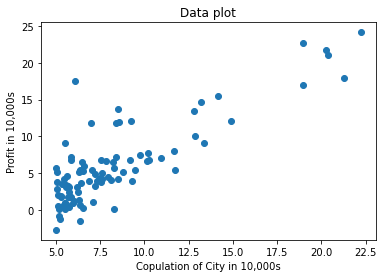

In [6]:
x = data.values[:, 0]
y = data.values[:, 1]
plt.scatter(x,y)
plt.xlabel("Copulation of City in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.title("Data plot")
plt.show()

Ex. 3. In order to make the cost function work (intercept value $θ_0$ has to be multiplied by 1) we need to insert a column of ones at the top of x.

In [7]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)

Ex. 4. We need to separate our data into independent variables X and our dependent variable y. We also need to initialise parameter θ.

In [8]:
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X, y and parameter θ.

In [9]:
def computeCost(X, y, theta):
    f = theta.T@X
    return np.sum((f-y)**2)/(2*len(y[0]))

Ex. 6 Test the cost function with ( θ = 0 ).

In [10]:
computeCost(X,y,theta)

32.072733877455676

Ex. 7 Please implement the gradient descent algorithm:

In [11]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        cost.append(computeCost(X,y,theta))
        # error vector
        error = theta.T@X-y
        # gradient
        grad = X @ error.T
        # update weights
        theta = theta - (alpha/len(y[0]))*grad
    return theta, cost

alpha = 0.01
it = 1000

Ex. 8 Please calculate the optimal parameters for the dataset.

In [12]:
theta_suboptimal, cost_hist = simple_gradient(X, y, theta, alpha, it)

Ex. 9 Please calculate the cost function for the given θ (Ex.8).

In [13]:
computeCost(X,y,theta_suboptimal)

4.515955503078913

Ex. 10 Plot the regression function and our dataset.

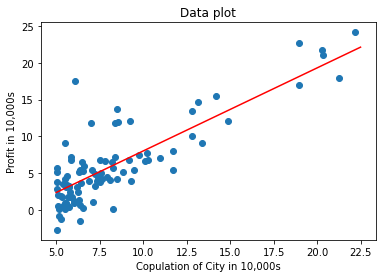

In [14]:
plt.scatter(x,y)
plt.plot([5,22.5],[5*theta_suboptimal[1]+theta_suboptimal[0],22.5*theta_suboptimal[1]+theta_suboptimal[0]],'r')
plt.xlabel("Copulation of City in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.title("Data plot")
plt.show()

Ex. 11 Plot the relationship between the cost function and number of iterations.

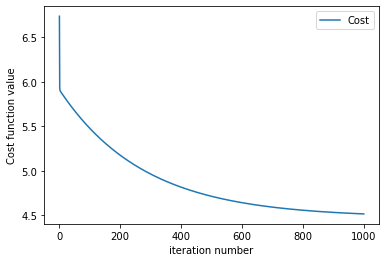

In [15]:
plt.plot([i+1 for i in range(len(cost_hist[1:]))],cost_hist[1:],label="Cost")
plt.xlabel("iteration number")
plt.ylabel("Cost function value")
plt.legend()
plt.show()


## Linear regression with multiple variables

In [16]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head(10)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


Ex. 1. Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation (2 lines of code).

In [17]:
from copy import deepcopy
#feature normalization
data2_normalized = deepcopy(data2)
for i in data2.columns:
    data2_normalized[i] = (data2[i]-data2[i].mean())/(data2[i].std())

Ex.2 Please perform steps 3-11 from the previous task by using the same functions.

In [18]:

x = data2_normalized.values[:, :2]
y = data2_normalized.values[:, 2]
one = np.ones(x.shape[0], dtype=np.float32)
one.shape = [1,one.shape[0]]
X = np.concatenate((one.T,x), axis=1).T
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)
# gradient descent
theta_suboptimal, cost_hist = simple_gradient(X, y, theta, alpha, it)
print(f"final cost function: {computeCost(X,y,theta_suboptimal)}")


final cost function: 0.13070336960771892


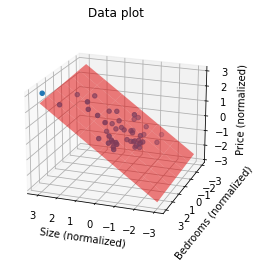

In [19]:

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], y[0,:], label='curve in (x, y)')
points = [()]
xx, yy = np.meshgrid(range(-3,4), range(-3,4))
z = theta[0] + theta_suboptimal[1]*xx + theta_suboptimal[2]*yy
ax.plot_surface(xx, yy, z, alpha=0.5,color="red")


ax.set_xlabel("Size (normalized)")
ax.set_ylabel("Bedrooms (normalized)")
ax.set_zlabel("Price (normalized)")
ax.set_title("Data plot")
ax.view_init(20, 110)
plt.show()

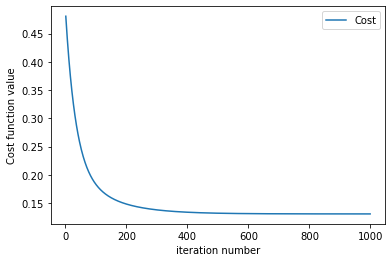

In [20]:
plt.plot([i+1 for i in range(len(cost_hist[1:]))],cost_hist[1:],label="Cost")
plt.xlabel("iteration number")
plt.ylabel("Cost function value")
plt.legend()
plt.show()

C:\Users\nikos\AppData\Local\Temp/ipykernel_17552/133384119.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_zticks([100000,300000,500000,700000],["     100,000","     300,000","     500,000","     700,000"])


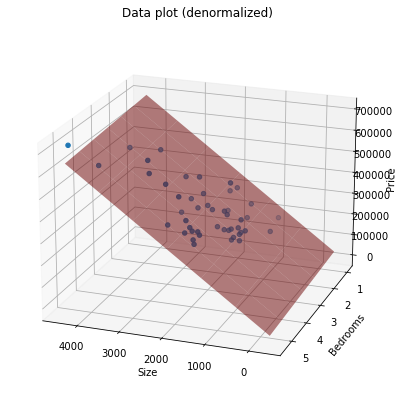

In [21]:
ax = plt.figure(figsize=[7,7]).add_subplot(projection='3d')
ax.scatter(data2.values[:,0], data2.values[:,1], data2.values[:,2], label='curve in (x, y)')
points = [()]
xx, yy = np.meshgrid(range(-3,4), range(-3,4))
z = theta[0] + theta_suboptimal[1]*xx + theta_suboptimal[2]*yy
ax.plot_surface(xx*data2.values[:,0].std() + data2.values[:,0].mean(), yy*data2.values[:,1].std() + data2.values[:,1].mean(), z*data2.values[:,2].std() + data2.values[:,2].mean(), alpha=0.5,color="red")


ax.set_xlabel("Size")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Data plot (denormalized)")
ax.set_zticks([100000,300000,500000,700000],["     100,000","     300,000","     500,000","     700,000"])
ax.view_init(20, 110)
plt.show()

In [22]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
# Data import
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head(10)
 
# Normalization
data2_normalized = deepcopy(data2)
for i in data2.columns:
    data2_normalized[i] = (data2[i]-data2[i].mean())/(data2[i].std())
 
# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(data2_normalized[['Size', 'Bedrooms']],data2_normalized['Price'] , test_size=0.3, random_state=2)
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.87347386 0.01235155]
Residual sum of squares: 0.14238327576733


In [23]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
# Data import
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head(10)
 
# Normalization
data2_normalized = deepcopy(data2)
for i in data2.columns:
    data2_normalized[i] = (data2[i]-data2[i].mean())/(data2[i].std())
 
# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(data2_normalized[['Size', 'Bedrooms']],data2_normalized['Price'] , test_size=0.3, random_state=2)
 
# Creating an object 
regr = linear_model.Ridge()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.83658829 0.02908929]
Residual sum of squares: 0.14375896447356204


In [28]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
# Data import
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
 
# Normalization
data2_normalized = deepcopy(data2)
for i in data2.columns:
    data2_normalized[i] = (data2[i]-data2[i].mean())/(data2[i].std())
data = data2_normalized[['Size', 'Bedrooms']].to_numpy()
# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(data2_normalized[['Size', 'Bedrooms']].to_numpy(),data2_normalized['Price'].to_numpy() , test_size=0.3, random_state=2)
 
# Creating an object 
regr = linear_model.Lasso(alpha = 0.1)
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.77136443 0.        ]
Residual sum of squares: 0.13587021020783477


In [27]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
# Data import
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head(10)
 
# Normalization
data2_normalized = deepcopy(data2)
for i in data2.columns:
    data2_normalized[i] = (data2[i]-data2[i].mean())/(data2[i].std())
 
# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(data2_normalized[['Size', 'Bedrooms']].to_numpy(),data2_normalized['Price'].to_numpy() , test_size=0.3, random_state=2)
 
# Creating an object 
regr = linear_model.ElasticNet(alpha = 0.1)
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.78031402 0.00580807]
Residual sum of squares: 0.13637014301393116
